# Group Comparison Analysis: Study Habits and Exam Performance
## T-tests and ANOVA

This notebook explores exam score differences across groups using:
- **T-tests**: Comparing exam scores between two groups
- **ANOVA**: Comparing exam scores across three or more groups

### Research Questions:
1. Do students with high study hours score higher on exams than students with low study hours?
2. Do students with good mental health score higher on exams than students with poor mental health?
3. Does exam performance differ across multiple study hour categories?
4. Does exam performance differ across multiple mental health categories?

### Statistical Methods:
- Independent samples t-test
- One-way ANOVA
- Post-hoc tests (Tukey HSD)
- Effect size measures (Cohen's d, eta-squared)

In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## 1. Data Loading and Preparation

In [32]:
# Load the dataset
df = pd.read_csv('/Users/jje/src/Stats500FinalProject/data/student_habits_performance.csv', keep_default_na=False)

print(f"Dataset shape: {df.shape}")
print(f"Variables of interest:")
print(df[['study_hours_per_day', 'mental_health_rating', 'exam_score']].describe())

Dataset shape: (1000, 16)
Variables of interest:
       study_hours_per_day  mental_health_rating   exam_score
count           1000.00000           1000.000000  1000.000000
mean               3.55010              5.438000    69.601500
std                1.46889              2.847501    16.888564
min                0.00000              1.000000    18.400000
25%                2.60000              3.000000    58.475000
50%                3.50000              5.000000    70.500000
75%                4.50000              8.000000    81.325000
max                8.30000             10.000000   100.000000


## 2. Creating Group Categories

We'll create categorical groups based on continuous variables for group comparisons.

In [33]:
# Create study hours groups (2 groups for t-test)
studyMedian = df['study_hours_per_day'].median()
df['studyGroup2'] = df['study_hours_per_day'].apply(
    lambda x: 'Low Study Hours' if x < studyMedian else 'High Study Hours'
)

# Create study hours groups (3 groups for ANOVA)
studyQ1 = df['study_hours_per_day'].quantile(0.33)
studyQ2 = df['study_hours_per_day'].quantile(0.67)
df['studyGroup3'] = df['study_hours_per_day'].apply(
    lambda x: 'Low' if x < studyQ1 else ('Medium' if x < studyQ2 else 'High')
)

# Create mental health groups (2 groups for t-test)
mentalMedian = df['mental_health_rating'].median()
df['mentalGroup2'] = df['mental_health_rating'].apply(
    lambda x: 'Lower Mental Health' if x < mentalMedian else 'Higher Mental Health'
)

# Create mental health groups (3 groups for ANOVA)
mentalQ1 = df['mental_health_rating'].quantile(0.33)
mentalQ2 = df['mental_health_rating'].quantile(0.67)
df['mentalGroup3'] = df['mental_health_rating'].apply(
    lambda x: 'Low' if x < mentalQ1 else ('Medium' if x < mentalQ2 else 'High')
)

print(f"Group Distribution - Study Hours (2 groups): {df['studyGroup2'].value_counts()}")
print(f"Group Distribution - Study Hours (3 groups):  {df['studyGroup3'].value_counts()}")
print(f"Group Distribution - Mental Health (2 groups):  {df['mentalGroup2'].value_counts()}")
print(f"Group Distribution - Mental Health (3 groups):  {df['mentalGroup3'].value_counts()}")

Group Distribution - Study Hours (2 groups): studyGroup2
High Study Hours    529
Low Study Hours     471
Name: count, dtype: int64
Group Distribution - Study Hours (3 groups):  studyGroup3
Medium    347
High      339
Low       314
Name: count, dtype: int64
Group Distribution - Mental Health (2 groups):  mentalGroup2
Higher Mental Health    589
Lower Mental Health     411
Name: count, dtype: int64
Group Distribution - Mental Health (3 groups):  mentalGroup3
High      382
Medium    317
Low       301
Name: count, dtype: int64


## 3. T-Test Analysis (2 Groups)

### 3.1 Study Hours Groups: Independent Samples T-Test

**Hypotheses:**
- H₀: Mean exam scores are equal between low and high study hour groups
- H₁: Mean exam scores differ between low and high study hour groups

In [34]:
# Separate groups
lowStudyScores = df[df['studyGroup2'] == 'Low Study Hours']['exam_score']
highStudyScores = df[df['studyGroup2'] == 'High Study Hours']['exam_score']

# Descriptive statistics
print("Descriptive Statistics by Study Hours Group:")
print(f"Low Study Hours (n={len(lowStudyScores)}):")
print(f"Mean: {lowStudyScores.mean():.2f}")
print(f"SD: {lowStudyScores.std():.2f}")
print(f"Median: {lowStudyScores.median():.2f}")

print(f"High Study Hours (n={len(highStudyScores)}):")
print(f"Mean: {highStudyScores.mean():.2f}")
print(f"SD: {highStudyScores.std():.2f}")
print(f"Median: {highStudyScores.median():.2f}")

print(f"Mean Difference: {highStudyScores.mean() - lowStudyScores.mean():.2f} points")

Descriptive Statistics by Study Hours Group:
Low Study Hours (n=471):
Mean: 57.81
SD: 13.28
Median: 58.40
High Study Hours (n=529):
Mean: 80.10
SD: 12.17
Median: 79.60
Mean Difference: 22.30 points


In [35]:
# 1. Normality test
statLow, pLow = shapiro(lowStudyScores)
statHigh, pHigh = shapiro(highStudyScores)

print("1. Normality (Shapiro-Wilk test):")
print(f"Low Study Hours: p = {pLow:.4f} {'(Normal)' if pLow > 0.05 else '(Not Normal)'}")
print(f"High Study Hours: p = {pHigh:.4f} {'(Normal)' if pHigh > 0.05 else '(Not Normal)'}")

# 2. Homogeneity of variance
statLevene, pLevene = levene(lowStudyScores, highStudyScores)
print(f"2. Homogeneity of Variance (Levene's test):")
print(f"p = {pLevene:.4f} {'(Equal variances)' if pLevene > 0.05 else '(Unequal variances)'}")

1. Normality (Shapiro-Wilk test):
Low Study Hours: p = 0.1422 (Normal)
High Study Hours: p = 0.0000 (Not Normal)
2. Homogeneity of Variance (Levene's test):
p = 0.1378 (Equal variances)


In [36]:
# Perform t-test
tStat, pValue = ttest_ind(highStudyScores, lowStudyScores, equal_var=(pLevene > 0.05))

print("\nIndependent Samples T-Test Results:")
print(f"  t-statistic: {tStat:.4f}")
print(f"  p-value: {pValue:.4e}")
print(f"  Significance: {'Significant' if pValue < 0.05 else 'Not Significant'} at α = 0.05")

# Calculate Cohen's d (effect size)
pooledStd = np.sqrt(((len(lowStudyScores)-1)*lowStudyScores.std()**2 + 
                      (len(highStudyScores)-1)*highStudyScores.std()**2) / 
                     (len(lowStudyScores) + len(highStudyScores) - 2))
cohensD = (highStudyScores.mean() - lowStudyScores.mean()) / pooledStd

print(f"\nEffect Size (Cohen's d): {cohensD:.4f}")
if abs(cohensD) < 0.2:
    effect = "negligible"
elif abs(cohensD) < 0.5:
    effect = "small"
elif abs(cohensD) < 0.8:
    effect = "medium"
else:
    effect = "large"
print(f"  Interpretation: {effect.capitalize()} effect")


Independent Samples T-Test Results:
  t-statistic: 27.7087
  p-value: 8.4759e-126
  Significance: Significant at α = 0.05

Effect Size (Cohen's d): 1.7554
  Interpretation: Large effect


### 3.2 Mental Health Groups: Independent Samples T-Test

**Hypotheses:**
- H₀: Mean exam scores are equal between lower and higher mental health groups
- H₁: Mean exam scores differ between lower and higher mental health groups

In [37]:
# Separate groups
lowerMentalScores = df[df['mentalGroup2'] == 'Lower Mental Health']['exam_score']
higherMentalScores = df[df['mentalGroup2'] == 'Higher Mental Health']['exam_score']

# Descriptive statistics
print("Descriptive Statistics by Mental Health Group:")
print(f"Lower Mental Health (n={len(lowerMentalScores)}):")
print(f"Mean: {lowerMentalScores.mean():.2f}")
print(f"SD: {lowerMentalScores.std():.2f}")
print(f"Median: {lowerMentalScores.median():.2f}")

print(f"Higher Mental Health (n={len(higherMentalScores)}):")
print(f"Mean: {higherMentalScores.mean():.2f}")
print(f"SD: {higherMentalScores.std():.2f}")
print(f"Median: {higherMentalScores.median():.2f}")

print(f"Mean Difference: {higherMentalScores.mean() - lowerMentalScores.mean():.2f} points")

Descriptive Statistics by Mental Health Group:
Lower Mental Health (n=411):
Mean: 64.03
SD: 16.39
Median: 64.20
Higher Mental Health (n=589):
Mean: 73.49
SD: 16.14
Median: 74.00
Mean Difference: 9.45 points


In [38]:
# Check assumptions

# 1. Normality test
statLow, pLow = shapiro(lowerMentalScores)
statHigh, pHigh = shapiro(higherMentalScores)

print("1. Normality (Shapiro-Wilk test):")
print(f"Lower Mental Health: p = {pLow:.4f} {'(Normal)' if pLow > 0.05 else '(Not Normal)'}")
print(f"Higher Mental Health: p = {pHigh:.4f} {'(Normal)' if pHigh > 0.05 else '(Not Normal)'}")

# 2. Homogeneity of variance
statLevene, pLevene = levene(lowerMentalScores, higherMentalScores)
print(f"\n2. Homogeneity of Variance (Levene's test):")
print(f"   p = {pLevene:.4f} {'(Equal variances)' if pLevene > 0.05 else '(Unequal variances)'}")

1. Normality (Shapiro-Wilk test):
Lower Mental Health: p = 0.0834 (Normal)
Higher Mental Health: p = 0.0000 (Not Normal)

2. Homogeneity of Variance (Levene's test):
   p = 0.9070 (Equal variances)


In [39]:
# Perform t-test
tStat, pValue = ttest_ind(higherMentalScores, lowerMentalScores, equal_var=(pLevene > 0.05))

print("Independent Samples T-Test Results:")
print(f"t-statistic: {tStat:.4f}")
print(f"p-value: {pValue:.4e}")
print(f"Significance: {'Significant' if pValue < 0.05 else 'Not Significant'} at α = 0.05")

# Calculate Cohen's d (effect size)
pooledStd = np.sqrt(((len(lowerMentalScores)-1)*lowerMentalScores.std()**2 + 
                      (len(higherMentalScores)-1)*higherMentalScores.std()**2) / 
                     (len(lowerMentalScores) + len(higherMentalScores) - 2))
cohensD = (higherMentalScores.mean() - lowerMentalScores.mean()) / pooledStd

print(f"Effect Size (Cohen's d): {cohensD:.4f}")
if abs(cohensD) < 0.2:
    effect = "negligible"
elif abs(cohensD) < 0.5:
    effect = "small"
elif abs(cohensD) < 0.8:
    effect = "medium"
else:
    effect = "large"
print(f"Interpretation: {effect.capitalize()} effect")

Independent Samples T-Test Results:
t-statistic: 9.0529
p-value: 7.1393e-19
Significance: Significant at α = 0.05
Effect Size (Cohen's d): 0.5818
Interpretation: Medium effect


## 4. Visualization of T-Test Results

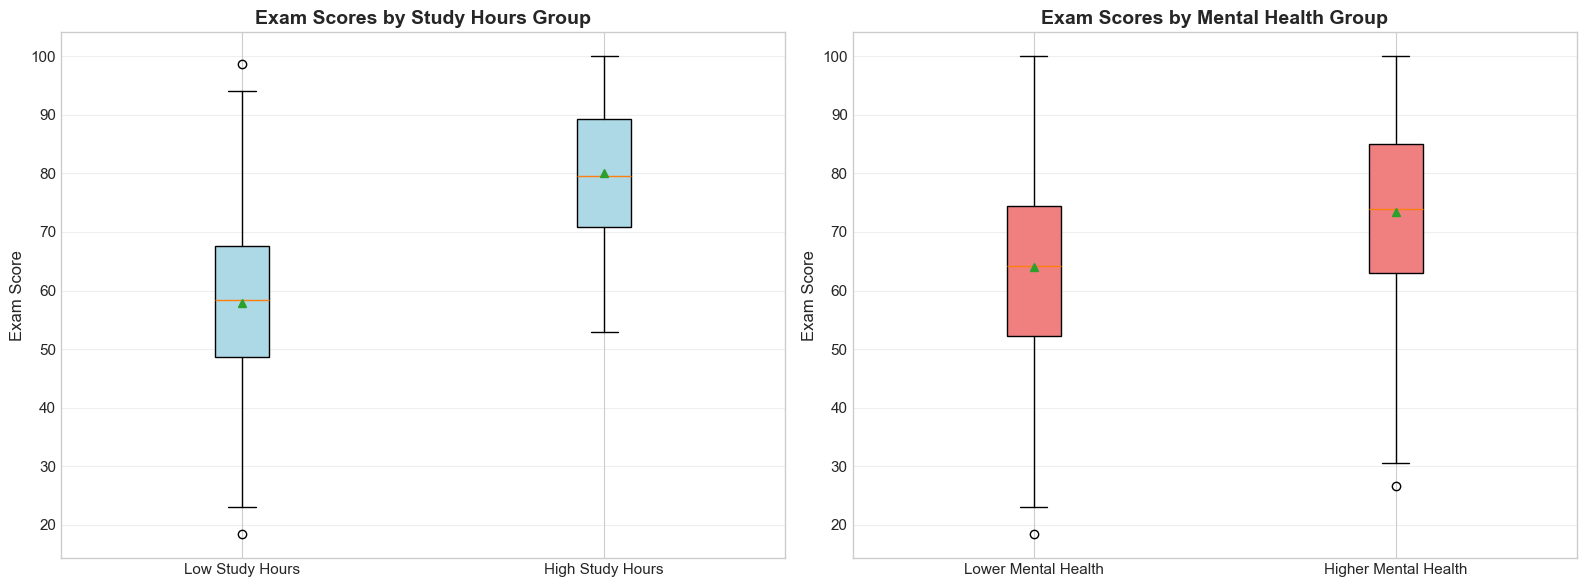

In [40]:
# Create comparison plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Study hours comparison
boxData1 = [lowStudyScores, highStudyScores]
bp1 = axes[0].boxplot(boxData1, labels=['Low Study Hours', 'High Study Hours'],
                       patch_artist=True, showmeans=True)
for patch in bp1['boxes']:
    patch.set_facecolor('lightblue')
axes[0].set_ylabel('Exam Score', fontsize=12)
axes[0].set_title('Exam Scores by Study Hours Group', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Mental health comparison
boxData2 = [lowerMentalScores, higherMentalScores]
bp2 = axes[1].boxplot(boxData2, labels=['Lower Mental Health', 'Higher Mental Health'],
                       patch_artist=True, showmeans=True)
for patch in bp2['boxes']:
    patch.set_facecolor('lightcoral')
axes[1].set_ylabel('Exam Score', fontsize=12)
axes[1].set_title('Exam Scores by Mental Health Group', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 5. One-Way ANOVA (3+ Groups)

### 5.1 Study Hours Groups: One-Way ANOVA

**Hypotheses:**
- H₀: Mean exam scores are equal across all study hour groups (Low, Medium, High)
- H₁: At least one group mean differs from the others

In [41]:
# Separate groups
lowStudy = df[df['studyGroup3'] == 'Low']['exam_score']
medStudy = df[df['studyGroup3'] == 'Medium']['exam_score']
highStudy = df[df['studyGroup3'] == 'High']['exam_score']

# Descriptive statistics
print("Descriptive Statistics by Study Hours Group (3 levels):")
print(f"Low (n={len(lowStudy)}):")
print(f"Mean: {lowStudy.mean():.2f}, SD: {lowStudy.std():.2f}")
print(f"Medium (n={len(medStudy)}):")
print(f"Mean: {medStudy.mean():.2f}, SD: {medStudy.std():.2f}")
print(f"High (n={len(highStudy)}):")
print(f"Mean: {highStudy.mean():.2f}, SD: {highStudy.std():.2f}")

Descriptive Statistics by Study Hours Group (3 levels):
Low (n=314):
Mean: 53.45, SD: 12.40
Medium (n=347):
Mean: 69.64, SD: 10.15
High (n=339):
Mean: 84.52, SD: 11.38


In [42]:
# Check assumptions for ANOVA

# 1. Normality
_, pLow = shapiro(lowStudy)
_, pMed = shapiro(medStudy)
_, pHigh = shapiro(highStudy)
print("1. Normality (Shapiro-Wilk):")
print(f"Low: p = {pLow:.4f}")
print(f"Medium: p = {pMed:.4f}")
print(f"High: p = {pHigh:.4f}")

# 2. Homogeneity of variance
statLevene, pLevene = levene(lowStudy, medStudy, highStudy)
print(f"2. Homogeneity of Variance (Levene's test):")
print(f"p = {pLevene:.4f} {'(Equal variances)' if pLevene > 0.05 else '(Unequal variances)'}")

1. Normality (Shapiro-Wilk):
Low: p = 0.6678
Medium: p = 0.7494
High: p = 0.0000
2. Homogeneity of Variance (Levene's test):
p = 0.0003 (Unequal variances)


In [43]:
# Perform ANOVA
fStat, pValue = f_oneway(lowStudy, medStudy, highStudy)

print("One-Way ANOVA Results:")
print(f"F-statistic: {fStat:.4f}")
print(f"p-value: {pValue:.4e}")
print(f"Significance: {'Significant' if pValue < 0.05 else 'Not Significant'} at α = 0.05")

# Calculate eta-squared (effect size)
allScores = pd.concat([lowStudy, medStudy, highStudy])
ssTotal = np.sum((allScores - allScores.mean())**2)
ssBetween = (len(lowStudy) * (lowStudy.mean() - allScores.mean())**2 + 
             len(medStudy) * (medStudy.mean() - allScores.mean())**2 + 
             len(highStudy) * (highStudy.mean() - allScores.mean())**2)
etaSquared = ssBetween / ssTotal

print(f"Effect Size (η²): {etaSquared:.4f}")
if etaSquared < 0.01:
    effect = "negligible"
elif etaSquared < 0.06:
    effect = "small"
elif etaSquared < 0.14:
    effect = "medium"
else:
    effect = "large"
print(f"Interpretation: {effect.capitalize()} effect")

One-Way ANOVA Results:
F-statistic: 614.6671
p-value: 1.1905e-174
Significance: Significant at α = 0.05
Effect Size (η²): 0.5522
Interpretation: Large effect


In [ ]:
# If ANOVA is Significant)
if pValue < 0.05:
    print("Post-Hoc Analysis (Tukey HSD):")
    
    # Prepare data for Tukey HSD
    studyData = df[['exam_score', 'studyGroup3']].copy()
    tukey = pairwise_tukeyhsd(endog=studyData['exam_score'], 
                               groups=studyData['studyGroup3'], 
                               alpha=0.05)
    
    print(tukey)
    
    print("Conclusion:")
    print("Exam scores differ Significantly across study hour groups.")
    print("See post-hoc results above for pairwise comparisons.")
else:
    print("Conclusion:")
    print("No Significant differences in exam scores across study hour groups.")


Post-Hoc Analysis (Tukey HSD):
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
  High    Low -31.0675   0.0 -33.1473 -28.9877   True
  High Medium -14.8809   0.0 -16.9087  -12.853   True
   Low Medium  16.1866   0.0  14.1184  18.2549   True
-----------------------------------------------------
Conclusion:
Exam scores differ Significantly across study hour groups.
See post-hoc results above for pairwise comparisons.


### 5.2 Mental Health Groups: One-Way ANOVA

**Hypotheses:**
- H₀: Mean exam scores are equal across all mental health groups (Low, Medium, High)
- H₁: At least one group mean differs from the others

In [45]:
# Separate groups
lowMental = df[df['mentalGroup3'] == 'Low']['exam_score']
medMental = df[df['mentalGroup3'] == 'Medium']['exam_score']
highMental = df[df['mentalGroup3'] == 'High']['exam_score']

# Descriptive statistics
print("Descriptive Statistics by Mental Health Group (3 levels):")
print(f"Low (n={len(lowMental)}):")
print(f"Mean: {lowMental.mean():.2f}, SD: {lowMental.std():.2f}")
print(f"Medium (n={len(medMental)}):")
print(f"Mean: {medMental.mean():.2f}, SD: {medMental.std():.2f}")
print(f"High (n={len(highMental)}):")
print(f"Mean: {highMental.mean():.2f}, SD: {highMental.std():.2f}")

Descriptive Statistics by Mental Health Group (3 levels):
Low (n=301):
Mean: 63.43, SD: 15.94
Medium (n=317):
Mean: 67.87, SD: 16.85
High (n=382):
Mean: 75.90, SD: 15.49


In [46]:
# Check assumptions
print("Assumption Checks for ANOVA:")

# 1. Normality
_, pLow = shapiro(lowMental)
_, pMed = shapiro(medMental)
_, pHigh = shapiro(highMental)
print("Normality (Shapiro-Wilk):")
print(f"Low: p = {pLow:.4f}")
print(f"Medium: p = {pMed:.4f}")
print(f"High: p = {pHigh:.4f}")

# 2. Homogeneity of variance
statLevene, pLevene = levene(lowMental, medMental, highMental)
print(f"2. Homogeneity of Variance (Levene's test):")
print(f"p = {pLevene:.4f} {'(Equal variances)' if pLevene > 0.05 else '(Unequal variances)'}")

Assumption Checks for ANOVA:
Normality (Shapiro-Wilk):
Low: p = 0.0848
Medium: p = 0.0105
High: p = 0.0000
2. Homogeneity of Variance (Levene's test):
p = 0.2683 (Equal variances)


In [47]:
# Perform ANOVA
fStat, pValue = f_oneway(lowMental, medMental, highMental)

print("\nOne-Way ANOVA Results:")
print(f"  F-statistic: {fStat:.4f}")
print(f"  p-value: {pValue:.4e}")
print(f"  Significance: {'Significant' if pValue < 0.05 else 'Not Significant'} at α = 0.05")

# Calculate eta-squared (effect size)
allScores = pd.concat([lowMental, medMental, highMental])
ssTotal = np.sum((allScores - allScores.mean())**2)
ssBetween = (len(lowMental) * (lowMental.mean() - allScores.mean())**2 + 
             len(medMental) * (medMental.mean() - allScores.mean())**2 + 
             len(highMental) * (highMental.mean() - allScores.mean())**2)
etaSquared = ssBetween / ssTotal

print(f"\nEffect Size (η²): {etaSquared:.4f}")
if etaSquared < 0.01:
    effect = "negligible"
elif etaSquared < 0.06:
    effect = "small"
elif etaSquared < 0.14:
    effect = "medium"
else:
    effect = "large"
print(f"  Interpretation: {effect.capitalize()} effect")


One-Way ANOVA Results:
  F-statistic: 53.4275
  p-value: 9.0758e-23
  Significance: Significant at α = 0.05

Effect Size (η²): 0.0968
  Interpretation: Medium effect


In [48]:
# Post-hoc test (if ANOVA is Significant)
if pValue < 0.05:
    print("\nPost-Hoc Analysis (Tukey HSD):")
    
    # Prepare data for Tukey HSD
    mentalData = df[['exam_score', 'mentalGroup3']].copy()
    tukey = pairwise_tukeyhsd(endog=mentalData['exam_score'], 
                               groups=mentalData['mentalGroup3'], 
                               alpha=0.05)
    
    print(tukey)
    
    print("\nConclusion:")
    print("  Exam scores differ Significantly across mental health groups.")
    print("  See post-hoc results above for pairwise comparisons.")
else:
    print("\nConclusion:")
    print("  No Significant differences in exam scores across mental health groups.")


Post-Hoc Analysis (Tukey HSD):
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  High    Low -12.4716    0.0 -15.3781 -9.5651   True
  High Medium  -8.0369    0.0 -10.9021 -5.1717   True
   Low Medium   4.4347 0.0018   1.3997  7.4696   True
-----------------------------------------------------

Conclusion:
  Exam scores differ Significantly across mental health groups.
  See post-hoc results above for pairwise comparisons.


## 6. Visualization of ANOVA Results

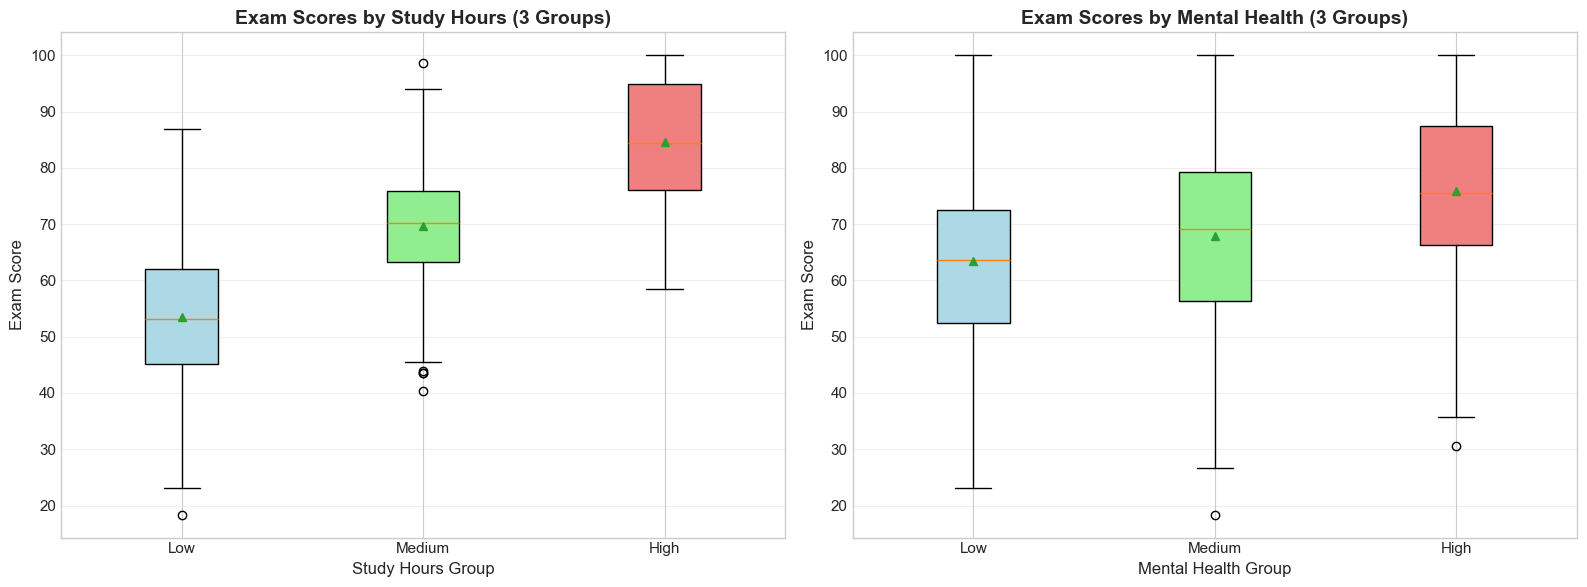

In [49]:
# Create comparison plots for 3 groups
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Study hours ANOVA visualization
boxData1 = [lowStudy, medStudy, highStudy]
bp1 = axes[0].boxplot(boxData1, labels=['Low', 'Medium', 'High'],
                       patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
axes[0].set_xlabel('Study Hours Group', fontsize=12)
axes[0].set_ylabel('Exam Score', fontsize=12)
axes[0].set_title('Exam Scores by Study Hours (3 Groups)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Mental health ANOVA visualization
boxData2 = [lowMental, medMental, highMental]
bp2 = axes[1].boxplot(boxData2, labels=['Low', 'Medium', 'High'],
                       patch_artist=True, showmeans=True)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
axes[1].set_xlabel('Mental Health Group', fontsize=12)
axes[1].set_ylabel('Exam Score', fontsize=12)
axes[1].set_title('Exam Scores by Mental Health (3 Groups)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 7. Summary and Conclusions

In [51]:
# Recalculate for summary
tStat1, pValue1 = ttest_ind(highStudyScores, lowStudyScores)
tStat2, pValue2 = ttest_ind(higherMentalScores, lowerMentalScores)

print("GROUP COMPARISON ANALYSIS SUMMARY")

print(f"1. Study Hours Groups:")
print(f"Low Study Hours: M = {lowStudyScores.mean():.2f}, SD = {lowStudyScores.std():.2f}")
print(f"High Study Hours: M = {highStudyScores.mean():.2f}, SD = {highStudyScores.std():.2f}")
print(f"t = {tStat1:.2f}, p = {pValue1:.4f}")
print(f"Result: {'Significant' if pValue1 < 0.05 else 'Not Significant'}")

print(f"2. Mental Health Groups:")
print(f"Lower Mental Health: M = {lowerMentalScores.mean():.2f}, SD = {lowerMentalScores.std():.2f}")
print(f"Higher Mental Health: M = {higherMentalScores.mean():.2f}, SD = {higherMentalScores.std():.2f}")
print(f"t = {tStat2:.2f}, p = {pValue2:.4f}")
print(f"Result: {'Significant' if pValue2 < 0.05 else 'Not Significant'}")

print("ANOVA RESULTS (3 Groups)")

# Recalculate for summary
fStat1, pValue1 = f_oneway(lowStudy, medStudy, highStudy)
fStat2, pValue2 = f_oneway(lowMental, medMental, highMental)

print(f"1. Study Hours Groups:")
print(f"Low: M = {lowStudy.mean():.2f}")
print(f"Medium: M = {medStudy.mean():.2f}")
print(f"High: M = {highStudy.mean():.2f}")
print(f"F = {fStat1:.2f}, p = {pValue1:.4f}")
print(f"Result: {'Significant' if pValue1 < 0.05 else 'Not Significant'}")

print(f"2. Mental Health Groups:")
print(f"Low: M = {lowMental.mean():.2f}")
print(f"Medium: M = {medMental.mean():.2f}")
print(f"High: M = {highMental.mean():.2f}")
print(f"F = {fStat2:.2f}, p = {pValue2:.4f}")
print(f"Result: {'Significant' if pValue2 < 0.05 else 'Not Significant'}") 

GROUP COMPARISON ANALYSIS SUMMARY
1. Study Hours Groups:
Low Study Hours: M = 57.81, SD = 13.28
High Study Hours: M = 80.10, SD = 12.17
t = 27.71, p = 0.0000
Result: Significant
2. Mental Health Groups:
Lower Mental Health: M = 64.03, SD = 16.39
Higher Mental Health: M = 73.49, SD = 16.14
t = 9.05, p = 0.0000
Result: Significant
ANOVA RESULTS (3 Groups)
1. Study Hours Groups:
Low: M = 53.45
Medium: M = 69.64
High: M = 84.52
F = 614.67, p = 0.0000
Result: Significant
2. Mental Health Groups:
Low: M = 63.43
Medium: M = 67.87
High: M = 75.90
F = 53.43, p = 0.0000
Result: Significant
